In [1]:
## Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Reading the csv file
project = pd.read_csv('bank.csv',sep = ';')

## Here we print the first 5 observations
project.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [17]:
## number of rows and columns
project.shape

(4521, 17)

In [2]:
## Converting variables
project['Deposit'] = np.where(project['y'] == 'yes', 1, 0)

project['Default'] = np.where(project['default'] == 'yes', 1, 0)

project['Loan'] = np.where(project['loan'] == 'yes', 1, 0)

project['Housing'] = np.where(project['housing'] == 'yes', 1, 0)

## Visualizing the changes 
project.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,Deposit,Default,Loan,Housing
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,79,1,-1,0,unknown,no,0,0,0,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,220,1,339,4,failure,no,0,0,1,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,185,1,330,1,failure,no,0,0,0,1
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,199,4,-1,0,unknown,no,0,0,1,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,226,1,-1,0,unknown,no,0,0,0,1


# Standardizing input variables

In [3]:
## Defining the input variables
X=project[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 
           'Default', 'Loan', 'Housing']]
## Standardizing the input variables
scaler = MinMaxScaler(feature_range = (-1, 1)).fit(X)
X = scaler.transform(X)                    

# Linear regression model

In [4]:
## Defining the target variable
Y=project['Deposit']

## split data into train (80%) and test (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
    test_size = 0.20,random_state = None, stratify = Y)

## Building the logistic regression model
logit_md = LogisticRegression().fit(X_train, Y_train)

## Predicting on test dataset
logit_preds = logit_md.predict(X_test)
logit_preds = logit_preds[:, ]
## Change to 0-1 using cutoff = 0.3
logit_preds = np.where(logit_preds > 0.3, 1, 0)

C:\Users\giraf\Anaconda3\envs\Python_and_R\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Random Forest model

In [5]:
## Building the random forest model
RF_md = RandomForestClassifier(n_estimators = 500).fit(X_train, Y_train)
## Predicting on test dataset
RF_preds = RF_md.predict_proba(X_test)
RF_preds = RF_preds[:, 1]
## Change to 0-1 using cutoff = 0.3
RF_preds = np.where(RF_preds > 0.3, 1, 0)

# SVM model

In [7]:
## Building the support vector machine model
SVM_md = SVC(kernel = 'linear', probability = True).fit(X_train, Y_train)

## Predicting on test dataset
SVM_preds = SVM_md.predict_proba(X_test)
SVM_preds = SVM_preds[:, 1]

## Change to 0-1 using cutoff = 0.3
SVM_preds = np.where(SVM_preds > 0.3, 1, 0)

## Printing model results for comparison

In [8]:
space = ''
print('The accuracy of random forest is:', accuracy_score(Y_test, RF_preds))
print('The recall of random forest is:', recall_score(Y_test, RF_preds))
print(space)
print('The accuracy of SVM is:', accuracy_score(Y_test, SVM_preds))
print('The recall of SVM is:', recall_score(Y_test, SVM_preds))
print(space)
print('The accuracy of logistic regression is:', accuracy_score(Y_test, logit_preds))
print('The recall of logistic regression is:', recall_score(Y_test, logit_preds))

The accuracy of random forest is: 0.8906077348066298
The recall of random forest is: 0.5961538461538461

The accuracy of SVM is: 0.8629834254143647
The recall of SVM is: 0.3076923076923077

The accuracy of logistic regression is: 0.8828729281767956
The recall of logistic regression is: 0.1346153846153846


## Creating age_group variable to better analyze age ranges

In [24]:
project['Age_group'] = np.where(project.age < 30, '[17, 30)',
np.where((project.age >= 30) &(project.age < 40), '[30, 40)',
np.where((project.age >= 40) &(project.age < 50), '[40, 50)',
np.where((project.age >= 50) &(project.age < 60), '[50, 60)',
np.where((project.age >= 60) &(project.age < 70), '[60, 70)', '70+')))))
project.groupby(['Age_group', 'Deposit']).agg({'Deposit': 'count'})

Deposit
Age_group Deposit         
70+       0             37
          1             24
[17, 30)  0            408
          1             74
[30, 40)  0           1623
          1            185
[40, 50)  0           1080
          1            123
[50, 60)  0            770
          1             84
[60, 70)  0             82
          1             31

## Visualizing age_group conversion %

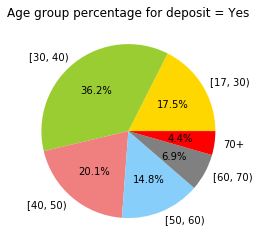

In [25]:
## Here we manually create the data
labels = ('[17, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+')
sizes = (928, 1913, 1063, 785, 365, 235)
## Here we declare the colors
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','grey','red']

# Here we create the pie chart
plt.pie(sizes, labels=labels, autopct = '%1.1f%%', colors = colors)
plt.title('Age group percentage for deposit = Yes')
plt.show();

## Visualizing duration range to check for outliers

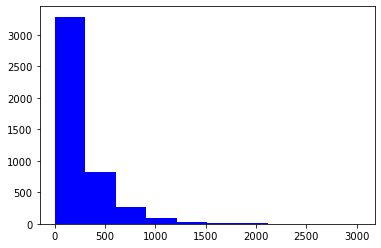

In [26]:
plt.hist(project.duration, color = 'blue')
plt.show();

## Creating duration_group to better analyze duration ranges

In [27]:
project['Duration_group'] = np.where(project.duration < 250, '[0-250)',
np.where((project.duration >= 250) &(project.duration < 500), '[250-500)',
np.where((project.duration >= 500) &(project.duration < 750), '[500-750)',
np.where((project.duration >= 750) &(project.duration < 1000), '[750-1000)', '1000+'))))
project.groupby(['Duration_group', 'Deposit']).agg({'Deposit': 'count'})

Deposit
Duration_group Deposit         
1000+          0             46
               1             61
[0-250)        0           2798
               1            116
[250-500)      0            837
               1            173
[500-750)      0            255
               1            100
[750-1000)     0             64
               1             71

## Visualizing duration groups that converted the most

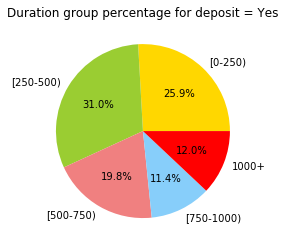

In [28]:
## Here we manually create the data
labels = ('[0-250)','[250-500)','[500-750)','[750-1000)', '1000+')
sizes = (1369, 1638, 1045, 601, 636)
## Here we declare the colors
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red']

# Here we create the pie chart
plt.pie(sizes, labels=labels, autopct = '%1.1f%%', colors = colors)
plt.title('Duration group percentage for deposit = Yes')
plt.show();

## Visualizing marital status and conversion

In [29]:
project.groupby(['marital', 'Deposit']).agg({'Deposit': 'count'})

Deposit
marital  Deposit         
divorced 0            451
         1             77
married  0           2520
         1            277
single   0           1029
         1            167

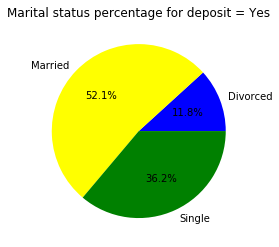

In [30]:
## Here we manually create the data
labels = ('Divorced','Married','Single')
sizes = (622,2755,1912)
## Here we declare the colors
colors = ['blue', 'yellow','green']

# Here we create the pie chart
plt.pie(sizes, labels=labels, autopct = '%1.1f%%', colors = colors)
plt.title('Marital status percentage for deposit = Yes')
plt.show();

## Visualizing education level and deposit

In [31]:
project.groupby(['education', 'Deposit']).agg({'Deposit': 'count'})

Deposit
education Deposit         
primary   0            614
          1             64
secondary 0           2061
          1            245
tertiary  0           1157
          1            193
unknown   0            168
          1             19

Text(0.5, 1.0, 'Education level percentage for deposit = Yes')

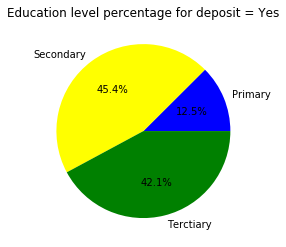

In [32]:
## Here we manually create the data
labels = ('Primary','Secondary','Terctiary')
sizes = (591,2150,1996)
## Here we declare the colors
colors = ['blue', 'yellow','green']

# Here we create the pie chart
plt.pie(sizes, labels=labels, autopct = '%1.1f%%', colors = colors)
plt.title('Education level percentage for deposit = Yes')

## Calculating silhouette to find out the best number of customers

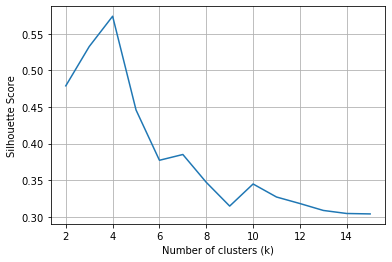

In [9]:
## Here we define a list to store the average silhouette scores
avg_silhouette = []

## Here we define the range of values for the number of cluster
krange = list(range(2, 16))

## Importing libraries 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score ## function that calculates silhouette score

## Here we start looping
for i in krange:
    
    ## First we define the k-means model
    cluster_md = KMeans(n_clusters = i, n_init = 20)
    cluster_assignments = cluster_md.fit_predict(X)
    
    ## Here we calculate the silhouette score
    silhouette_avg = silhouette_score(X, cluster_assignments)
    
    ## Storing the silhouette score
    avg_silhouette.append(silhouette_avg)
    
## Importing matplotlib
import matplotlib.pyplot as plt

## Visualize the silhouette scores for the different number of clusters
plt.plot(krange, avg_silhouette)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()

The silhouette graph shows us that 4 clusters should be used for this dataset.

## Performing PCA

Text(0, 0.5, 'Second Component')

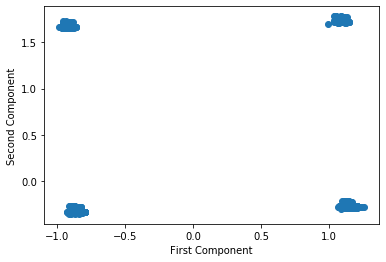

In [10]:
## Performing PCA
PCA_md = PCA()
PCA_md.fit(X)
## Importing numpy to calculate components
import numpy as np
Components = pd.DataFrame(PCA_md.fit_transform(X))
## Importing matplotlib 
import matplotlib.pyplot as plt

## Plotting the first two components
plt.plot(Components.loc[:,0], Components.loc[:,1], 'o')
plt.xlabel('First Component')
plt.ylabel('Second Component')

## Visualizing clusters¶

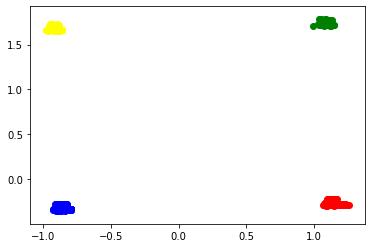

In [11]:
## Performing clustering
customers_cluster = KMeans(n_clusters = 4, n_init = 20)
customers_cluster.fit(X)
## Appending cluster labels
project['cluster'] = customers_cluster.labels_
Components['cluster'] = customers_cluster.labels_
## Visualizing data with clusters
colors = ['blue', 'red', 'green','yellow']

for c in project['cluster'].unique():
    temp = Components[Components['cluster'] == c]
    plt.scatter(temp[0], temp[1], color = colors[c])

In [12]:
## Here we create a column for each cluster 
project['cluster_1'] = project['cluster'] == 0
project['cluster_2'] = project['cluster'] == 1
project['cluster_3'] = project['cluster'] == 2
project['cluster_4'] = project['cluster'] == 3

## Visualizing the cluster numbers that converted the most

In [13]:
project.groupby(['cluster', 'Deposit']).agg({'Deposit': 'count'})

Deposit
cluster Deposit         
0       0           1958
        1            195
1       0           1394
        1            283
2       0            267
        1             18
3       0            381
        1             25

Text(0.5, 1.0, 'Cluster percentage for deposit = Yes')

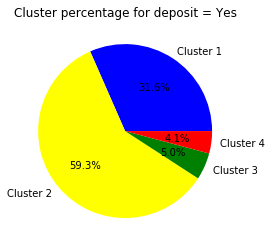

In [38]:
## Here we manually create the data
labels = ('Cluster 1','Cluster 2','Cluster 3', 'Cluster 4')
sizes = (1670,3135,265,219)
## Here we declare the colors
colors = ['blue', 'yellow','green', 'red']

# Here we create the pie chart
plt.pie(sizes, labels=labels, autopct = '%1.1f%%', colors = colors)
plt.title('Cluster percentage for deposit = Yes')


## Visualizing the customer's jobs that subscribed the most

In [14]:
project.groupby(['job', 'Deposit']).agg({'Deposit': 'count'})

Deposit
job           Deposit         
admin.        0            420
              1             58
blue-collar   0            877
              1             69
entrepreneur  0            153
              1             15
housemaid     0             98
              1             14
management    0            838
              1            131
retired       0            176
              1             54
self-employed 0            163
              1             20
services      0            379
              1             38
student       0             65
              1             19
technician    0            685
              1             83
unemployed    0            115
              1             13
unknown       0             31
              1              7

Text(0, 0.5, 'Job')

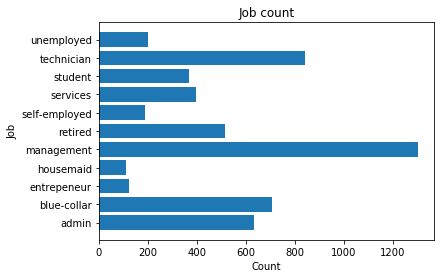

In [40]:
Jobs = ('admin', 'blue-collar', 'entrepeneur', 'housemaid', 'management', 'retired', 'self-employed',
         'services', 'student', 'technician', 'unemployed')

Count = (631, 708, 123, 109, 1301, 516, 187, 396, 369, 840, 202)

plt.barh(Jobs, Count)
plt.title('Job count')
plt.xlabel('Count')
plt.ylabel('Job')

## Builiding logistic regression model to make predictions

In [15]:
## Building the model
logit_md = smf.logit(formula = 'Deposit ~ duration + age + job + marital + education + cluster_1 + cluster_2 + cluster_3 + cluster_4' , data = project)
result = logit_md.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.279881
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Deposit   No. Observations:                 4521
Model:                          Logit   Df Residuals:                     4499
Method:                           MLE   Df Model:                           21
Date:                Mon, 15 Mar 2021   Pseudo R-squ.:                  0.2167
Time:                        22:54:19   Log-Likelihood:                -1265.3
converged:                       True   LL-Null:                       -1615.5
Covariance Type:            nonrobust   LLR p-value:                1.137e-134
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -2.8765   8.74e+06  -3.29e-07      1.000   -1.71e+07    1.71e+07
job[T.blue-collar]        -0.7228      0.221     -3.265      0.001      -1.157      -0.289
job[T.entrepreneur]       -0.7476      0.352     -2.121      0.034      -1.438      -0.057
job[T.housemaid]          -0.5522      0.386     -1.431      0.152      -1.308       0.204
job[T.management]         -0.3355      0.218     -1.538      0.124      -0.763       0.092
job[T.retired]             0.3469      0.277      1.250      0.211      -0.197       0.891
job[T.self-employed]      -0.6290      0.328     -1.916      0.055      -1.272       0.014
job[T.services]           -0.4414      0.247     -1.784      0.074      -0.926       0.043
job[T.student]             0.4685      0.337      1.388      0.165      -0.193       1.130
job[T.technician]         -0.3686      0.206     -1.787      0.074      -0.773       0.036
job[T.unemployed]         -0.8360      0.382     -2.188      0.029      -1.585      -0.087
job[T.unknown]             0.2956      0.486      0.609      0.543      -0.656       1.248
marital[T.married]        -0.3347      0.160     -2.089      0.037      -0.649      -0.021
marital[T.single]         -0.0791      0.187     -0.424      0.672      -0.445       0.287
education[T.secondary]     0.1271      0.186      0.682      0.495      -0.238       0.492
education[T.tertiary]      0.4931      0.213      2.311      0.021       0.075       0.911
education[T.unknown]      -0.2374      0.318     -0.746      0.456      -0.862       0.387
cluster_1[T.True]         -0.6598   8.74e+06  -7.55e-08      1.000   -1.71e+07    1.71e+07
cluster_2[T.True]          0.0894   8.74e+06   1.02e-08      1.000   -1.71e+07    1.71e+07
cluster_3[T.True]         -1.1422   8.74e+06  -1.31e-07      1.000   -1.71e+07    1.71e+07
cluster_4[T.True]         -1.1639   8.74e+06  -1.33e-07      1.000   -1.71e+07    1.71e+07
duration                   0.0039      0.000     20.906      0.000       0.003       0.004
age                        0.0056      0.006      0.881      0.379      -0.007       0.018
==========================================================================================
"""

By looking at the Logit Regression Results, we can see that duration, age, cluster_2, marital[single], job[student and retired], have a positive relationsip with deposit. 

Besides, other than the clusterings, job[unemployed], and marital[married], all of the variables have a p-value under 0.05, what means that we have strong evidence that those variables actually interfere in the deposit.

# Calculating probability of conversion (deposit)

In [53]:
## Formula applied using the most popular category of each column when deposit = yes
## intercept + age(35) + marital(married) + job(management) + education(secondary) + duration(361) + cluster(2)
result = (np.exp(-2.7171 + 0.0147*35 + -0.0061 + -0.2535 + 0.3973 + 0.0046*361) + 0.3798 / (1+ np.exp(-2.7171 + 0.0147*35 + -0.0061 + -0.2535 + 0.3973 + 0.0046*361 + 0.3798)))*100
print(round(result,2),'%','**Result obtained by using values with high probability of conversion**')

85.97 % **Result obtained by using values with high probability of conversion**


## Creating variable to hold the number of the campaigns that succeed

In [43]:
project['successful_campaigns'] = project['campaign'][np.logical_and(project['Deposit'] == 1, 
                                            project['marital'] == 'married')]

In [44]:
## Visualizing results
project.successful_campaigns.value_counts()

1.0     131
2.0      69
3.0      29
4.0      27
6.0       6
7.0       5
5.0       5
17.0      1
12.0      1
13.0      1
10.0      1
24.0      1
Name: successful_campaigns, dtype: int64

## Manualy generating a bar plot to represent the number of conversions for each campaign

Text(0.5, 1.0, 'Campaign count')

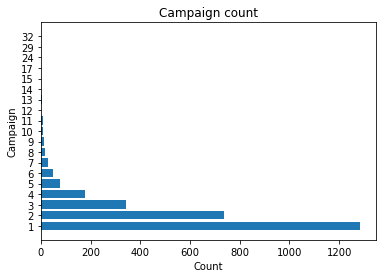

In [45]:
Campaigns = ('1', '2', '3', '4','5','6','7','8','9','10','11','12','13','14','15','17','24','29','32')
Count = (1283, 736,342,178,76,48,30,15,14,9,10,2,4,2,2,1,1,1,1)

plt.barh(Campaigns, Count)
plt.xlabel('Count')
plt.ylabel('Campaign')
plt.title('Campaign count')

## Conversion rate by campaign

In [46]:
## Conversion rate by campaign
(project.groupby('campaign')['Deposit'].sum() / project.groupby('campaign')['Deposit'].count())*100

campaign
1     13.840830
2     10.917722
3     10.215054
4     13.230769
5      5.389222
6     10.322581
7      8.000000
8      7.142857
9      6.666667
10     3.703704
11     0.000000
12     4.761905
13    11.764706
14     0.000000
15     0.000000
16     0.000000
17    14.285714
18     0.000000
19     0.000000
20     0.000000
21     0.000000
22     0.000000
23     0.000000
24    33.333333
25     0.000000
28     0.000000
29     0.000000
30     0.000000
31     0.000000
32     0.000000
44     0.000000
50     0.000000
Name: Deposit, dtype: float64

By looking at the previous plot and at the convertion rate, we can see that campaign 1 was the most successful.

## A/B Testing

In [47]:
## Sepaating customer groups
customer_1 = project['Deposit'][np.logical_and(project['campaign'] == 1,
    project['marital'] == 'married')]

customer_2 = project['Deposit'][np.logical_and(project['campaign'] == 3,
    project['marital'] == 'single')]
## Importing scipy.stats
from scipy.stats import ttest_ind

## Comparing sales
ttest_ind(customer_1,customer_2, equal_var = False)

Ttest_indResult(statistic=-0.9011669063758415, pvalue=0.368828927151467)

High p-value, what is good because we have enough evidence that campaign 1, when applied for married people, will probably result in a subscription if compared to campaign 3 applied for a single person.

In [48]:
## Sepaating customer groups
customer_1 = project['Deposit'][np.logical_and(project['campaign'] == 1,
    project['education'] == 'secondary')]

customer_2 = project['Deposit'][np.logical_and(project['campaign'] == 5,
    project['education'] == 'primary')]
## Importing scipy.stats
from scipy.stats import ttest_ind

## Comparing sales
ttest_ind(customer_1,customer_2, equal_var = False)

Ttest_indResult(statistic=1.0073592791801198, pvalue=0.3230085905282939)

Another high p-value, but now for campaign 1 applied for seomeone who completed the secondary education when compared to campaign 5 being appied to someone who completed the primary education.

## Creating a columns for each cluster to analyze quick facts about each cluster

In [49]:
project.groupby('cluster_1')[['age','balance','duration']].describe()

age                                                     balance  \
            count       mean        std   min   25%   50%   75%   max   count   
cluster_1                                                                       
False      2368.0  42.717483  11.679895  19.0  33.0  41.0  51.0  87.0  2368.0   
True       2153.0  39.468184   8.908302  21.0  33.0  38.0  46.0  75.0  2153.0   

                        ...                  duration                          \
                  mean  ...     75%      max    count        mean         std   
cluster_1               ...                                                     
False      1477.645270  ...  1532.0  71188.0   2368.0  260.246199  256.704918   
True       1362.179285  ...  1429.0  27733.0   2153.0  268.047376  263.278683   

                                             
           min    25%    50%    75%     max  
cluster_1                                    
False      5.0  104.0  180.0  327.0  3025.0  
True       4.0  104.0  191.0  332.0  2456.0  

[2 rows x 24 columns]

In [50]:
project.groupby('cluster_2')[['age','balance','duration']].describe()

age                                                     balance  \
            count       mean        std   min   25%   50%   75%   max   count   
cluster_2                                                                       
False      2844.0  39.813643   9.113256  21.0  33.0  38.0  47.0  75.0  2844.0   
True       1677.0  43.470483  12.343720  19.0  34.0  42.0  52.0  87.0  1677.0   

                        ...                   duration              \
                  mean  ...      75%      max    count        mean   
cluster_2               ...                                          
False      1254.054852  ...  1313.25  27733.0   2844.0  266.311885   
True       1708.589147  ...  1840.00  71188.0   1677.0  259.974955   

                                                         
                  std  min    25%    50%    75%     max  
cluster_2                                                
False      261.479426  4.0  103.0  187.0  330.0  2456.0  
True       257.109661  5.0  106.0  182.0  328.0  3025.0  

[2 rows x 24 columns]

In [51]:
project.groupby('cluster_3')[['age','balance','duration']].describe()

age                                                     balance  \
            count       mean        std   min   25%   50%   75%   max   count   
cluster_3                                                                       
False      4115.0  41.396112  10.723741  19.0  33.0  39.0  49.0  87.0  4115.0   
True        406.0  38.879310   8.627416  24.0  32.0  37.0  45.0  60.0   406.0   

                        ...                  duration                          \
                  mean  ...     75%      max    count        mean         std   
cluster_3               ...                                                     
False      1473.318591  ...  1544.5  71188.0   4115.0  263.872175  260.548320   
True        909.187192  ...   964.5  19447.0    406.0  264.864532  253.051069   

                                              
           min    25%    50%     75%     max  
cluster_3                                     
False      4.0  104.0  185.0  330.00  3025.0  
True       8.0  104.0  187.0  316.25  1689.0  

[2 rows x 24 columns]

In [52]:
project.groupby('cluster_4')[['age','balance','duration']].describe()

age                                                     balance  \
            count       mean        std   min   25%   50%   75%   max   count   
cluster_4                                                                       
False      4236.0  40.996223  10.572781  19.0  33.0  39.0  48.0  87.0  4236.0   
True        285.0  43.754386  10.304315  22.0  35.0  45.0  53.0  61.0   285.0   

                        ...                   duration              \
                  mean  ...      75%      max    count        mean   
cluster_4               ...                                          
False      1455.903211  ...  1517.25  71188.0   4236.0  264.546506   
True        928.526316  ...   879.00  27069.0    285.0  255.263158   

                                                         
                  std  min    25%    50%    75%     max  
cluster_4                                                
False      259.849885  4.0  105.0  187.0  330.0  3025.0  
True       260.258520  5.0   90.0  166.0  316.0  2029.0  

[2 rows x 24 columns]